# Feature Engineering & Polynomial Regression

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

Lets try an example where the output is square of input. We would try first without feature engineering.

In [36]:
#functoin to predict y from x given parameters w and b
def hypothesis(x, w, b):
    return w * x + b

#calculate cost from current training set.
#x and y both are vetors here.
def calculate_cost(w, b, x, y):
    cost = 0.0
    m = x.size
    for i in range(m):
        y_hat = hypothesis(x[i], w, b)
        cost = cost + (y_hat - y[i])**2
    return cost/(2*m)    

def calculate_gradient(w, b, x, y):
    w_grad = 0.0
    b_grad = 0.0
    m = x.size
    for i in range(m):
        f_w_b = hypothesis(x[i], w, b)
        w_grad = w_grad + (f_w_b - y[i]) * x[i]
        b_grad = b_grad + (f_w_b - y[i])
    return (w_grad/m, b_grad/m)   

def gradient_decent(w, b, alpha, num_iter, x_train, y_train):
    cost_history = []
    for i in range(num_iter):
        (w_delta, b_delta) = calculate_gradient(w,b,x_train,y_train)
        w = w - alpha * w_delta
        b = b - alpha * b_delta
        cost_history.append(calculate_cost(w, b, x_train, y_train))
        if i % 100 == 0:
            print(f'Iteration {i} - Cost {cost_history[i]}')
    
    return (w,b, cost_history)



In [90]:
x = np.arange(0,20,1)
print(x)

y = x**2
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [91]:
w,b,j = gradient_decent(0.0, 0.0, 1e-2, 1000, x, y)
print(w)
print(b)

Iteration 0 - Cost 1664.716112500001
Iteration 100 - Cost 703.5241279111615
Iteration 200 - Cost 593.7265631471626
Iteration 300 - Cost 529.4860884462128
Iteration 400 - Cost 491.900203926153
Iteration 500 - Cost 469.9094150701932
Iteration 600 - Cost 457.04302119167926
Iteration 700 - Cost 449.5151379255816
Iteration 800 - Cost 445.11071606479766
Iteration 900 - Cost 442.53377228896625
18.692815346570875
-53.015253823173225


In [92]:
predict_x = x * w + b
print(predict_x)

[-53.01525382 -34.32243848 -15.62962313   3.06319222  21.75600756
  40.44882291  59.14163826  77.8344536   96.52726895 115.2200843
 133.91289964 152.60571499 171.29853034 189.99134568 208.68416103
 227.37697638 246.06979172 264.76260707 283.45542242 302.14823776]


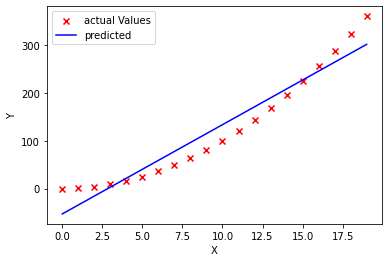

In [93]:
plt.scatter(x,y,marker="x",c="r",label="actual Values")
plt.plot(x, predict_x, c="b",label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [94]:

def multi_bulk_predict(x_train, w, b):
    predict = []
    m = x_train.shape[0]
    
    for i in range(m):
        predict.append(multi_predict(x_train[i],w,b))
    return predict    

#Here x is the feature vector, w is the parameter vector and b is bias.
def multi_predict(x,w,b):
    return np.dot(x,w) + b

# xs is m training set for x
#y is output vector
#w is parameter vector and b is bias
def multi_compute_cost(xs, y, w, b):
    m = xs.shape[0]
    cost = 0.0
    for i in range(m):
        cost = cost + ( multi_predict(xs[i], w, b) - y[i])**2
    return cost / (2 * m)    

def multi_gradient(x_train, y_train, w, b):
    m,n = x_train.shape # n is number of features.
    
    w_delta = np.zeros((n,))
    b_delta = 0.0
    
    for i in range(m):
        err = multi_predict(x_train[i], w, b) - y_train[i]
        b_delta = b_delta + err 
        for j in range(n):
            w_delta[j] = w_delta[j] + err * x_train[i][j]
    
    return (w_delta/m, b_delta/m)
    
    
def multi_gradient_descent(x_train, y_train, w_in, b_in, a, num_iter):
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    j_history = []
    
    for i in range(num_iter):
        w_delta, b_delta = multi_gradient(x_train, y_train, w, b)
        w = w - a * w_delta
        b = b - a * b_delta
        cost = multi_compute_cost(x_train, y_train, w, b)
        j_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    
    return (w,b, j_history)

Feature Engineering - 
Lets get another feature caled x**2

In [95]:
x2 = x**2
print(x2)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [101]:
x_train = np.c_[x, x2, x**3]
print(x_train)
y_train = y
print(y_train)

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


[0. 0. 0.]
Iteration    0: Cost  1140.29   
Iteration  100: Cost   378.84   
Iteration  200: Cost   372.89   
Iteration  300: Cost   367.04   
Iteration  400: Cost   361.27   
Iteration  500: Cost   355.60   
Iteration  600: Cost   350.01   
Iteration  700: Cost   344.52   
Iteration  800: Cost   339.11   
Iteration  900: Cost   333.78   
Iteration 1000: Cost   328.54   
Iteration 1100: Cost   323.38   
Iteration 1200: Cost   318.30   
Iteration 1300: Cost   313.30   
Iteration 1400: Cost   308.38   
Iteration 1500: Cost   303.54   
Iteration 1600: Cost   298.77   
Iteration 1700: Cost   294.08   
Iteration 1800: Cost   289.46   
Iteration 1900: Cost   284.92   
Iteration 2000: Cost   280.44   
Iteration 2100: Cost   276.04   
Iteration 2200: Cost   271.70   
Iteration 2300: Cost   267.44   
Iteration 2400: Cost   263.24   
Iteration 2500: Cost   259.10   
Iteration 2600: Cost   255.04   
Iteration 2700: Cost   251.03   
Iteration 2800: Cost   247.09   
Iteration 2900: Cost   243.21   

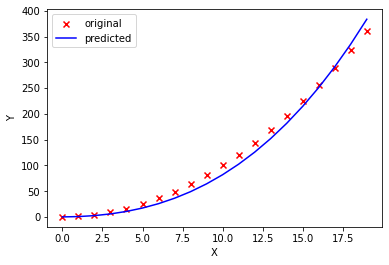

In [104]:
n = x_train.shape[1]
w_in = np.zeros(n)
print(w_in)
#iterations=10000, alpha=1e-7
w,b,j = multi_gradient_descent(x_train, y_train, w_in, 0.0, 1e-7, 10000)

x_predict = multi_bulk_predict(x_train, w, b)

plt.scatter(x,y,marker="x", c="r", label="original")
plt.plot(x,x_predict, c="b", label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

As Gradient decent is slow - lets try feature scaling. Feature scaling becomes more important in case of polynomial regression. 

In [105]:
# X - 2-D Array - mxn where 
#m is number of training set and n is number of features.
def z_score_normalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_sclae = (X - mu) / std
    return X_sclae , mu, std

In [118]:
x_norm, mu, sigma = z_score_normalize(x_train)
print(x_train)
print(x_norm)
w_in = np.zeros(n)
w,b,j = multi_gradient_descent(x_norm, y_train, w_in, 0.0, 1e-1, 100000)

print(f'w - {w}, b - {b}')

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
[[-1.64750894 -1.08815641 -0.86396619]
 [-1.47408695 -1.07934543 -0.86348754]
 [-1.30066495 -1.05291248 -0.86013698]
 [-1.12724296 -1.00885756 -0.8510426 ]
 [-0.95382097 -0.94718068 -0.83333249]
 [-0.78039897 -0.86788183 -0.80413474]
 [-0.60697698 -0.77096102 -0.76057744]
 [-0.43355498 -0.65641824 -0.69978868]
 [-0.26013299 -0.52425349 -0.61889656]
 [-0.086711   -0.37446678 -0.51502915]
 [ 0.086711   -0.2070581  -0.38531456]
 [ 0.26013299 -0.02202746 -0.22688087]
 [ 0.43355498  0.18062515 -0.03685618]
 [ 0.60697698  0.40089973  0.18763144]
 [ 0.78039897  0.63879627  0.44945388]
 [ 0.95382097  0.89431478  0.75148306]
 [ 1.12724296  

Iteration 21100: Cost     0.02   
Iteration 21200: Cost     0.02   
Iteration 21300: Cost     0.02   
Iteration 21400: Cost     0.02   
Iteration 21500: Cost     0.02   
Iteration 21600: Cost     0.02   
Iteration 21700: Cost     0.02   
Iteration 21800: Cost     0.02   
Iteration 21900: Cost     0.02   
Iteration 22000: Cost     0.02   
Iteration 22100: Cost     0.02   
Iteration 22200: Cost     0.02   
Iteration 22300: Cost     0.02   
Iteration 22400: Cost     0.01   
Iteration 22500: Cost     0.01   
Iteration 22600: Cost     0.01   
Iteration 22700: Cost     0.01   
Iteration 22800: Cost     0.01   
Iteration 22900: Cost     0.01   
Iteration 23000: Cost     0.01   
Iteration 23100: Cost     0.01   
Iteration 23200: Cost     0.01   
Iteration 23300: Cost     0.01   
Iteration 23400: Cost     0.01   
Iteration 23500: Cost     0.01   
Iteration 23600: Cost     0.01   
Iteration 23700: Cost     0.01   
Iteration 23800: Cost     0.01   
Iteration 23900: Cost     0.01   
Iteration 2400

Iteration 47000: Cost     0.00   
Iteration 47100: Cost     0.00   
Iteration 47200: Cost     0.00   
Iteration 47300: Cost     0.00   
Iteration 47400: Cost     0.00   
Iteration 47500: Cost     0.00   
Iteration 47600: Cost     0.00   
Iteration 47700: Cost     0.00   
Iteration 47800: Cost     0.00   
Iteration 47900: Cost     0.00   
Iteration 48000: Cost     0.00   
Iteration 48100: Cost     0.00   
Iteration 48200: Cost     0.00   
Iteration 48300: Cost     0.00   
Iteration 48400: Cost     0.00   
Iteration 48500: Cost     0.00   
Iteration 48600: Cost     0.00   
Iteration 48700: Cost     0.00   
Iteration 48800: Cost     0.00   
Iteration 48900: Cost     0.00   
Iteration 49000: Cost     0.00   
Iteration 49100: Cost     0.00   
Iteration 49200: Cost     0.00   
Iteration 49300: Cost     0.00   
Iteration 49400: Cost     0.00   
Iteration 49500: Cost     0.00   
Iteration 49600: Cost     0.00   
Iteration 49700: Cost     0.00   
Iteration 49800: Cost     0.00   
Iteration 4990

Iteration 72300: Cost     0.00   
Iteration 72400: Cost     0.00   
Iteration 72500: Cost     0.00   
Iteration 72600: Cost     0.00   
Iteration 72700: Cost     0.00   
Iteration 72800: Cost     0.00   
Iteration 72900: Cost     0.00   
Iteration 73000: Cost     0.00   
Iteration 73100: Cost     0.00   
Iteration 73200: Cost     0.00   
Iteration 73300: Cost     0.00   
Iteration 73400: Cost     0.00   
Iteration 73500: Cost     0.00   
Iteration 73600: Cost     0.00   
Iteration 73700: Cost     0.00   
Iteration 73800: Cost     0.00   
Iteration 73900: Cost     0.00   
Iteration 74000: Cost     0.00   
Iteration 74100: Cost     0.00   
Iteration 74200: Cost     0.00   
Iteration 74300: Cost     0.00   
Iteration 74400: Cost     0.00   
Iteration 74500: Cost     0.00   
Iteration 74600: Cost     0.00   
Iteration 74700: Cost     0.00   
Iteration 74800: Cost     0.00   
Iteration 74900: Cost     0.00   
Iteration 75000: Cost     0.00   
Iteration 75100: Cost     0.00   
Iteration 7520

Iteration 96600: Cost     0.00   
Iteration 96700: Cost     0.00   
Iteration 96800: Cost     0.00   
Iteration 96900: Cost     0.00   
Iteration 97000: Cost     0.00   
Iteration 97100: Cost     0.00   
Iteration 97200: Cost     0.00   
Iteration 97300: Cost     0.00   
Iteration 97400: Cost     0.00   
Iteration 97500: Cost     0.00   
Iteration 97600: Cost     0.00   
Iteration 97700: Cost     0.00   
Iteration 97800: Cost     0.00   
Iteration 97900: Cost     0.00   
Iteration 98000: Cost     0.00   
Iteration 98100: Cost     0.00   
Iteration 98200: Cost     0.00   
Iteration 98300: Cost     0.00   
Iteration 98400: Cost     0.00   
Iteration 98500: Cost     0.00   
Iteration 98600: Cost     0.00   
Iteration 98700: Cost     0.00   
Iteration 98800: Cost     0.00   
Iteration 98900: Cost     0.00   
Iteration 99000: Cost     0.00   
Iteration 99100: Cost     0.00   
Iteration 99200: Cost     0.00   
Iteration 99300: Cost     0.00   
Iteration 99400: Cost     0.00   
Iteration 9950

[5.920442079343502e-05, 1.0000671552118376, 4.00007274219702, 9.000075965376297, 16.00007682474967, 25.00007532031715, 36.00007145207874, 49.00006522003444, 64.00005662418425, 81.00004566452816, 100.00003234106619, 121.00001665379831, 143.99999860272456, 168.9999781878449, 195.99995540915933, 224.9999302666679, 255.99990276037056, 288.9998728902673, 323.9998406563582, 360.99980605864323]


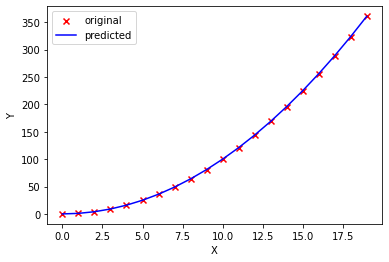

In [120]:
#w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000
#print(x_norm)
def predict_train(x_train, w, b):
    predict = []
    m = x_train.shape[0]
    
    for i in range(m):
        x = x_train[i]
        p = w[0]*x[0] + w[1]*x[1] + b
        predict.append(p)
    return predict   

x_predict = predict_train(x_norm, w, b)
print(x_predict)

plt.scatter(x,y,marker="x", c="r", label="original")
plt.plot(x,x_predict, c="b", label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()